In [1]:
#Plot geological data versus species richness (python project 5 for the course "Linux and python für Biologen" SoSe2023)

In [2]:
import pandas as pd   # import pandas to manage dataframes
import numpy as np    # need np.nan object and np.where function
# import matplotlib.pyplot as plt # to draw scatter plot, in the end not used
import seaborn as sns # library for statistical visualisation, used to create the scatter plot

full_file = 'global_data_50mLC2.txt' # data downloaded 'from https://www.research-collection.ethz.ch/handle/20.500.11850/411821'
short_file = 'data_cut'              # the first 50000 lines of the full file (generated via console command)
sample_file = 'data_sample'          # a random sample of circa 500000 lines from the full file (generated with separate python scrypt)

In [3]:
# pandas not well suited to process big data, so set chunksize to read one chunk of data at a time
# (approach abandoned in favor of statistical resampling)
# chunksize = 50000

# below is the link to the dataset. (Hoped to be able to remotely open the dataset one 
# chunk at the time rather than downloading the full file. Did not work.)
# url = "https://www.research-collection.ethz.ch/bitstream/handle/20.500.11850/411821/global_data_50mLC2.txt?sequence=1&isAllowed=y"

# create iterator:
# reader = pd.read_csv(full_file, chunksize=chunksize, sep=",", header=None)   # "," is the default separator, but it does not hurt to leave it explicit
# data = next(reader) #reading the first chunk

In [4]:
# alternative approach: 
# create a smaller cut by selecting the first 50000 lines of the dataset
# using a console command (this file is small enough to be shared through GitHub).

# head -n 50000 global_data_50mLC2.txt > data_cut

# Problem: this data is not statistically meaningful. Random resampling is a better approach.

In [5]:
# Problem: the .txt dataset has comma-separated values, but no indication as to what the 
# different columns represent. Need to find it out next.

In [6]:
# First attempt to find out the structure of the dataset from the description provided with the file.
# Failed because the description is not accurate (too many columns)

# column description copied from 'https://www.research-collection.ethz.ch/handle/20.500.11850/411821'
desc_string = "elevation [m], local relief [m], slope [° *10],precipitation [mm/a] ,temperature [°C *10] ,NDVI average [0-255], NDVI maximum [0-255], latitude [°N *100] ,ksn ,tetrapod species richness [number of species], amphibian species richness [number of species], mammal species richness [number of species], Köppen-Geiger Climate Zone (see for legend http://www.gloh2o.org/koppen/), Geologic unit (see https://www.geo.uni-hamburg.de/en/geologie/forschung/geochemie/glim.html), Landcover (see https://globalmaps.github.io/glcnmo.html), strain rate [10e-9/yr]" 

col_descr = desc_string.split(',') # splitting the string
# print(col_descr)
print(len(col_descr)) # print number of items (note that there are too many! Dataset has 15 columns)

# formatting the data as a dataframe
structure = pd.DataFrame(col_descr, columns=['description'])
structure

16


,description
0,elevation [m]
1,local relief [m]
2,slope [° *10]
3,precipitation [mm/a]
4,temperature [°C *10]
5,NDVI average [0-255]
6,NDVI maximum [0-255]
7,latitude [°N *100]
8,ksn
9,tetrapod species richness [number of species]


In [7]:
# columns name as inferred from `vars` assignement from the code from the
# GlobalLith.r file (contained the GlobalLith.zip archive)
col_names = ["Elev", "Locrel", "slope", "P", 'T', 'NDVI', 'Lat', 'ksn', 'Tetrapods', 'Amphibians', 'Mammals', 'KG', 'Geo', 'LC', 'SR']

In [8]:
# creating a list of dictionaries to create a dataframe for simpler inspection of data
struct_dict = [
    {'description': 'elevation', 'unit': 'm'},
    {'description': 'local relief', 'unit': 'm'},
    {'description': 'slope', 'unit': '° *10'},
    {'description': 'precipitation', 'unit': 'mm/a'},
    {'description': 'temperature', 'unit': '°C *10'},
    {'description': 'normalized difference vegetation index (average or max?)', 'unit': '0-255'},
    {'description': 'latitude', 'unit': '°N *100'},
    {'description': 'global normalized river channel steepness', 'unit': np.nan},
    {'description': 'tetrapod species richness', 'unit': 'number of species'},
    {'description': 'amphibian species richness', 'unit': 'number of species'},
    {'description': 'mammal species richness', 'unit': 'number of species'},
    {'description': 'Köppen-Geiger Climate Zone (see for legend http://www.gloh2o.org/koppen/)', 'unit': np.nan},
    {'description': 'Geologic unit (see https://www.geo.uni-hamburg.de/en/geologie/forschung/geochemie/glim.html)', 'unit': np.nan},
    {'description': 'Landcover (see https://globalmaps.github.io/glcnmo.html)', 'unit': np.nan},
    {'description': 'strain rate (??)', 'unit': '10e-9/yr'}
]
#create dataframe containing information for the coloumns
structure = pd.DataFrame(struct_dict, index=col_names) # instead of numbers, use col_names as row-index
structure

,description,unit
Elev,elevation,m
Locrel,local relief,m
slope,slope,° *10
P,precipitation,mm/a
T,temperature,°C *10
NDVI,normalized difference vegetation index (averag...,0-255
Lat,latitude,°N *100
ksn,global normalized river channel steepness,NaN
Tetrapods,tetrapod species richness,number of species
Amphibians,amphibian species richness,number of species


In [9]:
# create dataframe `data` from roughly 50000 randomly chosen lines of the dataset
data = pd.read_csv(sample_file, sep=",", header=None, names=col_names)
data.replace(-9999, np.nan, inplace=True) # filtering the data using np.nan to relace -9999

In [10]:
# printing infos about the dataframe `data`

print(f"Size of dataframe:   {data.shape}")  # using f-strings to format the print output  
print(f"\nColumn types:\n{data.dtypes}")
data

Size of dataframe:   (51109, 15)

Column types:
Elev            int64
Locrel          int64
slope           int64
P               int64
T               int64
NDVI            int64
Lat             int64
ksn             int64
Tetrapods       int64
Amphibians    float64
Mammals         int64
KG              int64
Geo             int64
LC              int64
SR              int64
dtype: object


,Elev,Locrel,slope,P,T,NDVI,Lat,ksn,Tetrapods,Amphibians,Mammals,KG,Geo,LC,SR
0,22,62,16,63,204,40,271,33,210,1.0,32,2,2,10,0
1,291,105,20,98,193,54,273,104,189,1.0,33,2,2,7,0
2,239,39,8,91,209,56,270,29,196,1.0,34,2,9,7,0
3,292,78,17,96,209,57,270,68,198,1.0,36,2,9,7,0
4,101,59,9,92,221,45,272,29,184,1.0,33,2,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51104,188,134,21,2592,241,92,-176,66,70,1.0,3,1,8,1,40
51105,203,178,74,3299,242,86,-177,107,71,1.0,3,1,2,1,43
51106,95,235,39,2213,248,123,-175,65,71,1.0,3,1,2,1,46
51107,181,315,50,2814,244,125,-165,152,69,1.0,3,1,9,1,258


In [11]:
# subdividing the coloumns into numerical/non-numerical geographic features and species

numerical_geo_features = ["Elev", "Locrel", "slope", "P", 'T', 'NDVI', 'Lat', 'ksn']
non_numerical_geo_features = ['KG', 'Geo', 'LC', 'SR']
species = ['Tetrapods', 'Amphibians', 'Mammals']

# Compute the pearson correlation btw numerical geographic features and the species.

# data.corr() returns a dataframe af all the Pearson correlation coefficients between
# the columns in data. Use `loc` to select the columns and rows we wish to examine.
pearson_corr = data.corr().loc[numerical_geo_features, species]
pearson_corr

,Tetrapods,Amphibians,Mammals
Elev,-0.226475,-0.268051,-0.165308
Locrel,-0.030307,-0.168167,-0.026227
slope,-0.035199,-0.152398,-0.034675
P,0.613781,0.532630,0.570130
T,0.519302,0.544458,0.488079
NDVI,0.626063,0.559136,0.564955
Lat,-0.457346,-0.474843,-0.392716
ksn,0.007999,-0.048766,0.011159


In [12]:
# identify coloumns with significant correlation

threshold = 0.3  # significant (positive or negative) correlation if the absolute value is > 0.3

# make a dataframe with the same shape as `pearson_corr` with boolean values
# (True for cells with correlations above the threshold, False otherwise). 
filter_df = abs(pearson_corr) > threshold
print(filter_df)
print("\n ")

# numpy's `where` function returns the coordinates of the True elements in the dataframe
tuple_of_coord = np.where(filter_df) # tuple consiting of two lists
print(tuple_of_coord)
print("\n")

# For convenience, combine the two lists into one list of tuples using the built-in zip function
correlating_indices = [(x,y) for x,y in zip(tuple_of_coord[0], tuple_of_coord[1])]  # a list consisting of pairs
print(correlating_indices)
print("\n ")

# For convenience, convert the numerical index to the corresponding label
correlating_pairs = [(numerical_geo_features[x],species[y]) for (x,y) in correlating_indices]
print(correlating_pairs)

# create the list of pairs of columns from the dataframe with significant correlation
correlating_columns = [(data[x], data[y]) for x, y in correlating_pairs]

        Tetrapods  Amphibians  Mammals
Elev        False       False    False
Locrel      False       False    False
slope       False       False    False
P            True        True     True
T            True        True     True
NDVI         True        True     True
Lat          True        True     True
ksn         False       False    False

 
(array([3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6]), array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]))


[(3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (5, 0), (5, 1), (5, 2), (6, 0), (6, 1), (6, 2)]

 
[('P', 'Tetrapods'), ('P', 'Amphibians'), ('P', 'Mammals'), ('T', 'Tetrapods'), ('T', 'Amphibians'), ('T', 'Mammals'), ('NDVI', 'Tetrapods'), ('NDVI', 'Amphibians'), ('NDVI', 'Mammals'), ('Lat', 'Tetrapods'), ('Lat', 'Amphibians'), ('Lat', 'Mammals')]


In [13]:
# Convenience block to visualize the correlating columns

print("Pairs with statistical correlation (correlation index):")
i = 0
for x, y in correlating_pairs:
    # print the counter i, the names of the colums saved in the i-th pair of correlating pairs
    # then look up the correlation index from the `pearson_curr` dataframe and round it
    # to 3 digits.
    print(f"{i}:   {x}, {y}     ({pearson_corr.loc[x, y].round(3)})") 
    i = i+1

Pairs with statistical correlation (correlation index):
0:   P, Tetrapods     (0.614)
1:   P, Amphibians     (0.533)
2:   P, Mammals     (0.57)
3:   T, Tetrapods     (0.519)
4:   T, Amphibians     (0.544)
5:   T, Mammals     (0.488)
6:   NDVI, Tetrapods     (0.626)
7:   NDVI, Amphibians     (0.559)
8:   NDVI, Mammals     (0.565)
9:   Lat, Tetrapods     (-0.457)
10:   Lat, Amphibians     (-0.475)
11:   Lat, Mammals     (-0.393)


In [14]:
# Define a function to plot the scatterplot of a pair of columns

def plot_corr(pair):
    x, y = pair
    # regplot is a function of the seaborn library to plot scatterplots together with
    # the line of linear regression (it draws two plots and combines them).
    # The keyword arguments `line_kws` and `scatter_kws` take as input keyword arguments 
    # to be passed to the line plot (color='black') and the scatter plot (size=3) 
    # respectively. They are passed as dictionaries.
    sns.regplot(x=x, y=y, line_kws={'color': 'black'}, scatter_kws={'s': 3})

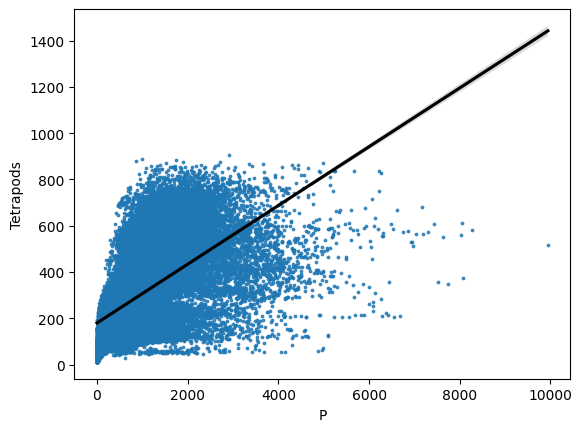

In [15]:
plot_corr(correlating_columns[0])

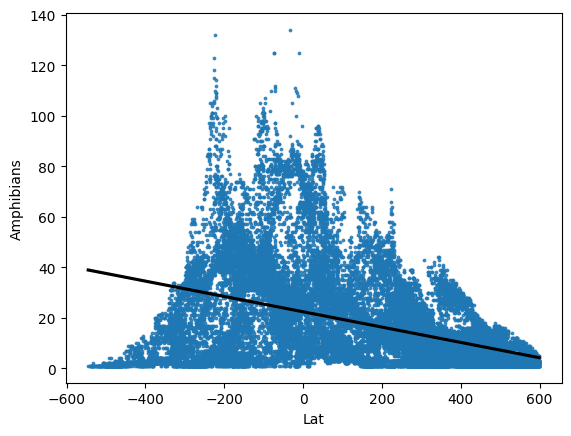

In [16]:
plot_corr(correlating_columns[10])

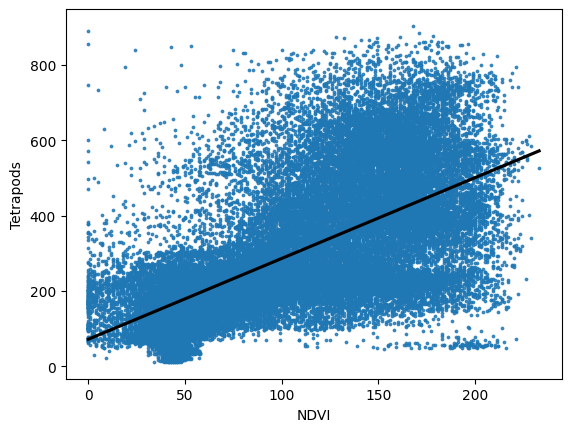

In [17]:
plot_corr(correlating_columns[6])